In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys
sys.path.append('../.')

In [4]:
path = ".././Kemal/saves/ModelResults_18042024.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
list(df)

['Layer Size',
 'Epoch',
 'Starting Side',
 'Loss',
 'Optimizer',
 'Learning Rate',
 'Wieght Decay',
 'Scheduler',
 'Gamma',
 'Train Accuracy',
 'Validation Accuracy',
 'Test Accuracy']

In [14]:
print(int(df_trainAcc[0]), type(int(df_trainAcc[0])))

87 <class 'int'>


In [15]:
df_trainAcc = df["Train Accuracy"]
df_valAcc = df["Validation Accuracy"]
df_testAcc = df["Test Accuracy"]

In [19]:
df_trainAcc = [int(i) for i in df_trainAcc]
df_valAcc = [int(i) for i in df_valAcc]
df_testAcc = [int(i) for i in df_testAcc]

print(type(df_trainAcc), df_trainAcc[0])

<class 'list'> 87


In [36]:
def accuracy_curve(run_name:str, legend:list,save_location=None, *args):
    #save_location = check_save_path(save_location)
    #lab = "VGG16 Accuracies for varying model sizes \n Rremoving layers from the front vs removing from the back "+run_name
    font1 = {'family':'georgia','color':'darkblue','size':19}
    font2 = {'family':'georgia','color':'darkblue','size':15}
    #data= args[1:]
    for idx,arg in enumerate(args):
        if isinstance(arg[0], str):
            label = arg[0]
            start =1
            plt.plot(range(len(args[0])-1), arg[start:], label=label)#, label =str(args[0]))
        else:
            label= legend[idx]
            start=0
        plt.plot(range(len(args[0])), arg[start:], label=label)#, label =str(args[0]))

    plt.xticks(range(len(args)))#, list(args.keys()))
    plt.title(run_name+"\n Accuracy Curve ", font1)
    plt.xlabel('Epochs', font2)
    plt.ylabel('Accuracy', font2)
    #plt.yscale("log")
    plt.legend()
    if save_location != None:
        plt.savefig(save_location+'/'+lab+'.png') #run_name
    else:
        print("Save Location Not Specified!")
    plt.show()

In [37]:
print(type(df_trainAcc), len(df_trainAcc))
print(type(df_valAcc), len(df_valAcc))
print(type(df_testAcc), len(df_testAcc))

<class 'list'> 45
<class 'list'> 45
<class 'list'> 45


Save Location Not Specified!


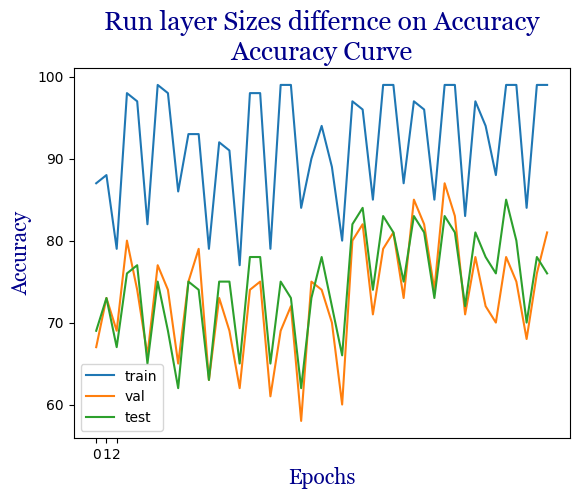

In [38]:
run_name = "layer Sizes differnce on Accuracy"#df['Layer Size']

accuracy_curve(f"Run {run_name}",["train", "val", "test"],None,df_trainAcc, df_valAcc,df_testAcc) 

<Axes: >

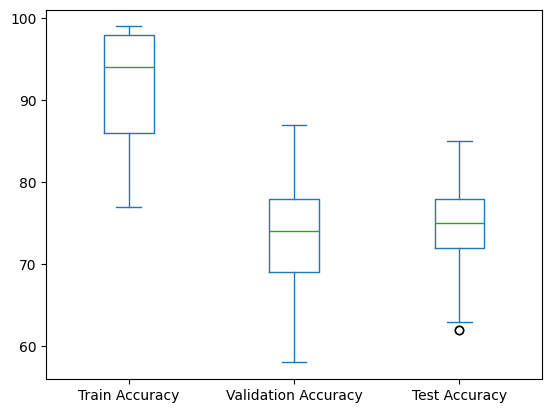

In [39]:
df_1_accuracies_end = df[["Train Accuracy","Validation Accuracy","Test Accuracy"]]

df_1_accuracies_end.plot.box()

/tmp/ipykernel_241839/1628513035.py:1: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(x="Wieght Decay", y="Test Accuracy", hue="Gamma", palette=["m", "g", "r", "y", "b"], data=df)


<Axes: xlabel='Wieght Decay', ylabel='Test Accuracy'>

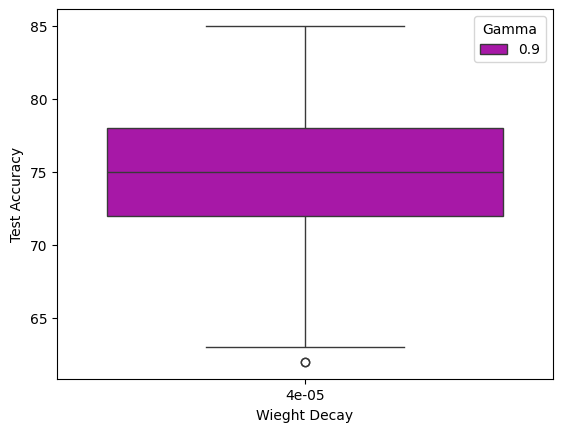

In [41]:
sns.boxplot(x="Wieght Decay", y="Test Accuracy", hue="Gamma", palette=["m", "g", "r", "y", "b"], data=df)

In [54]:
print(list(df))

print(np.unique(df['Loss']))
print(np.unique(df['Optimizer']))
print(np.unique(df['Learning Rate']))
print(np.unique(df['Wieght Decay']))
print(np.unique(df['Scheduler']))
print(np.unique(df['Gamma']))
print(np.unique(df['Starting Side']))

['Layer Size', 'Epoch', 'Starting Side', 'Loss', 'Optimizer', 'Learning Rate', 'Wieght Decay', 'Scheduler', 'Gamma', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
['Cross Entropy Loss']
['Adam']
[1.e-05]
[4.e-05]
['ExponentialLR']
[0.9]
['End']


/tmp/ipykernel_241839/2476706587.py:1: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(x="Layer Size", y="Test Accuracy", hue="Starting Side", palette=["m", "g", "r", "y", "b"], data=df)


<Axes: xlabel='Layer Size', ylabel='Test Accuracy'>

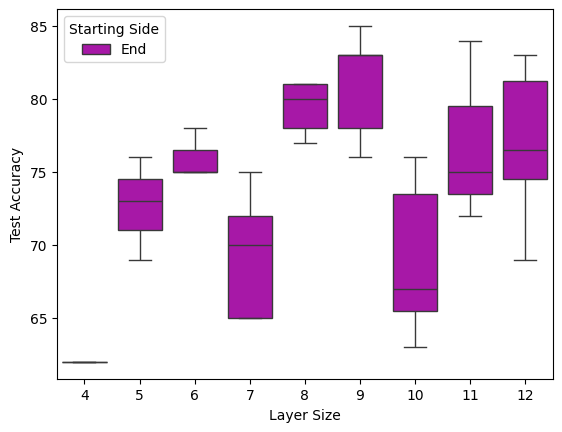

In [59]:
sns.boxplot(x="Layer Size", y="Test Accuracy", hue="Starting Side", palette=["m", "g", "r", "y", "b"], data=df)

/tmp/ipykernel_241839/1839018795.py:1: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(x="Layer Size", y="Validation Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df)


<Axes: xlabel='Layer Size', ylabel='Validation Accuracy'>

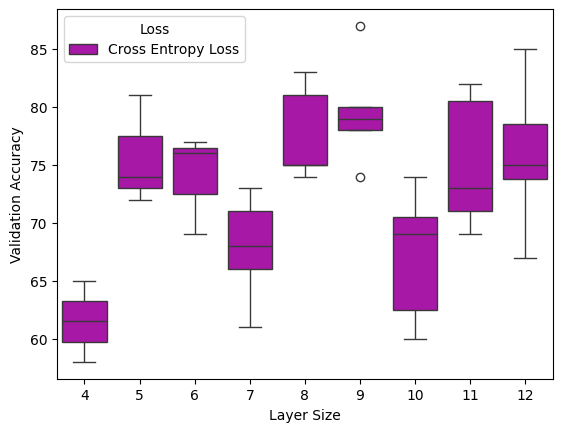

In [56]:
sns.boxplot(x="Layer Size", y="Validation Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df)

/tmp/ipykernel_241839/389065796.py:1: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.boxplot(x="Layer Size", y="Train Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df)


<Axes: xlabel='Layer Size', ylabel='Train Accuracy'>

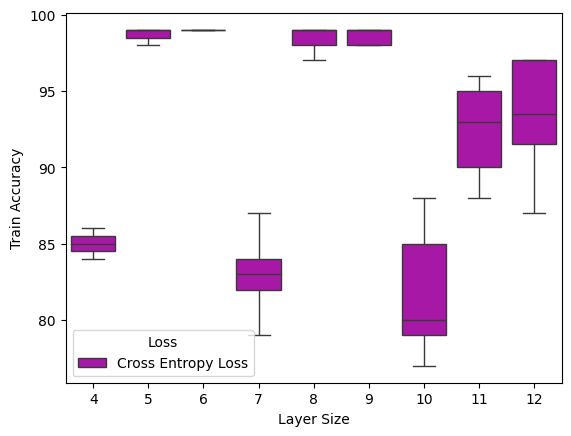

In [55]:
sns.boxplot(x="Layer Size", y="Train Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df)

In [72]:
#print(df.loc[0])

#title = str(df_b_2c2l_452144.loc[[0], ["loss_fn", "lr", "wd", "scheduler value", "seed"]])
df_layers = df[['Layer Size', 'Test Accuracy']]
#accuracy_curve(f"Run {run_name}",["train", "val", "test"],None,df_trainAcc, df_valAcc,df_testAcc) 




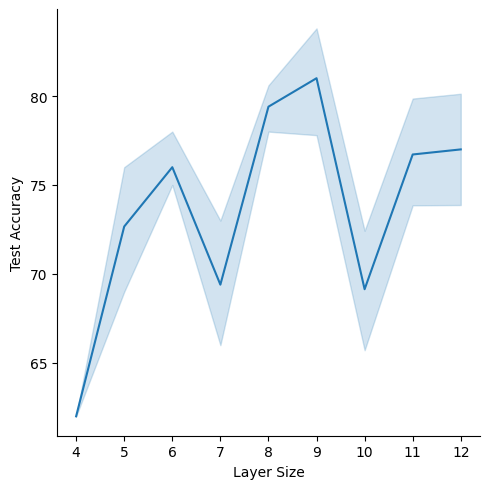

In [73]:
sns.relplot(data=df_layers, x="Layer Size", y="Test Accuracy", kind="line")

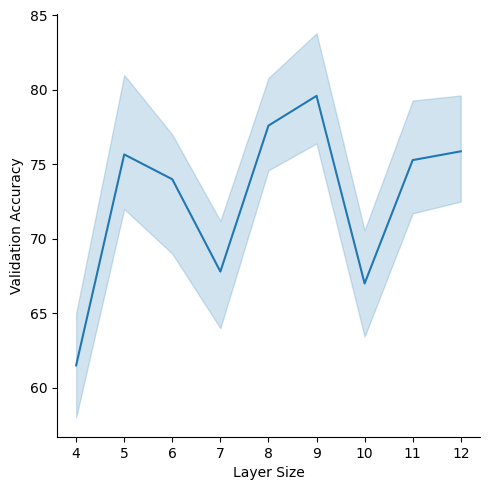

In [76]:
sns.relplot(data=df, x="Layer Size", y="Validation Accuracy", kind="line")

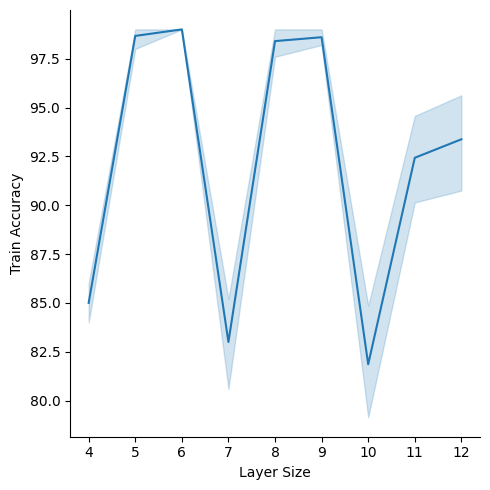

In [75]:
sns.relplot(data=df, x="Layer Size", y="Train Accuracy", kind="line")